https://medium.com/dataseries/image-semantic-segmentation-of-satellite-imagery-using-u-net-e99ae13cf464

In [ ]:
!pip install -U fastai

     |████████████████████████████████| 194kB 17.8MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os

## Unzipping data and moving to folders for data loading
!unzip "drive/MyDrive/LandCoverData.zip"
!mkdir LandCoverData/images
!mkdir LandCoverData/labels
!mv LandCoverData/M*.jpg LandCoverData/images
!mv LandCoverData/N*.jpg LandCoverData/images
!mv LandCoverData/M*.png LandCoverData/labels
!mv LandCoverData/N*.png LandCoverData/labels
## Configuring paths 

ROOT_PATH = ""
DATA_PATH = os.path.join(ROOT_PATH, "LandCoverData")
DATA_ZIP_PATH = os.path.join(ROOT_PATH, "LandCoverData.zip")
IMAGE_PATH = os.path.join(ROOT_PATH, "Images")
LABEL_PATH = os.path.join(ROOT_PATH, "Targets")

BATCH_SIZE = 4

Streaming output truncated to the last 5000 lines.
  inflating: LandCoverData/N-34-106-A-b-3-4_307.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_307_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_308.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_308_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_309.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_309_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_30_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_31.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_310.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_310_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_311.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_311_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_312.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_312_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_313.jpg  
  inflating: LandCoverData/N-34-106-A-b-3-4_313_m.png  
  inflating: LandCoverData/N-34-106-A-b-3-4_314.jpg  
  inflating: Land

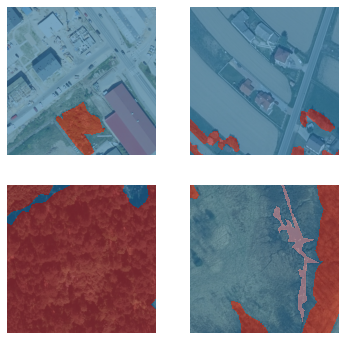

In [ ]:
import numpy as np
from fastai.vision.all import *
from fastai.vision.core import Path
from fastai.vision.data import SegmentationDataLoaders

## Path for data loader to train.
path = Path(DATA_PATH)
## Codes are the classes required.
codes = np.array(["building", "woodland", "water", "Background"])


## get_image_files load data from file paths
fnames = get_image_files(path/"images")
## We also need a function to return the label name from the folder.
def label_func(fn): return path/"labels"/f"{fn.stem}_m{'.png'}"


## SegmentationDataLoaders is used as the data loader.
dls = SegmentationDataLoaders.from_label_func(
    path, bs=BATCH_SIZE, fnames=fnames, label_func=label_func, codes=codes
)
## Showing batches of data (Batch size = 3)
dls.show_batch()

In [ ]:
## Since it is image segmentation we use dataloader and resnet18 which is a widely used transfer leanring model.
learn = unet_learner(dls, resnet18)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,time
0,0.417359,0.378904,26:59


epoch,train_loss,valid_loss,time
0,0.235921,0.181763,27:25
1,0.173165,0.167655,27:19
2,0.128443,0.130463,27:19


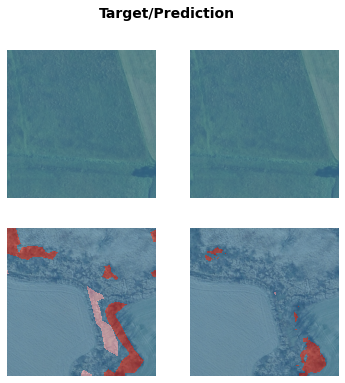

In [ ]:
learn.show_results()